In [1]:
import os
import pandas as pd
import numpy as np
from nilearn import image, input_data
from statsmodels.tsa.stattools import grangercausalitytests
import sys
import nibabel as nib

# Import your parameters
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'
sys.path.insert(0, curr_dir)
import ptoc_params as params

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
raw_dir = params.raw_dir
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
subs = ['sub-025']  # Update this list as needed
rois = ['pIPS', 'LO']  # We'll analyze the relationship between these two ROIs
hemispheres = ['left', 'right']
run_num = 3
runs = list(range(1, run_num + 1))
run_combos = [[rn1, rn2] for rn1 in range(1, run_num + 1) for rn2 in range(rn1 + 1, run_num + 1)]

/home/csimmon2/anaconda3/envs/fmri/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Set the 'sub' column as the index
df.set_index('sub', inplace=True)

# Create a boxplot
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Distribution of GCA values across ROI pairs')
plt.ylabel('GCA value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{results_dir}/gca/boxplot_roi_pairs.png")
plt.close()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GCA values')
plt.tight_layout()
plt.savefig(f"{results_dir}/gca/heatmap_roi_pairs.png")
plt.close()

# Calculate and print summary statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)

# Save summary statistics to a file
summary.to_csv(f"{results_dir}/gca/summary_statistics.csv")

print(f"Visualizations and summary statistics have been saved to {results_dir}/gca/")

In [5]:
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

def check_gca_summaries():
    for sub in subs:
        gca_file = f'{study_dir}/{sub}/ses-01/derivatives/gca/gca_summary.csv'
        if os.path.exists(gca_file):
            mod_time = os.path.getmtime(gca_file)
            print(f"GCA summary for {sub} last modified: {pd.to_datetime(mod_time, unit='s')}")
        else:
            print(f"GCA summary file not found for {sub}")

check_gca_summaries()

GCA summary for sub-025 last modified: 2024-09-17 22:57:28
GCA summary for sub-038 last modified: 2024-09-17 23:49:56.907954944
GCA summary for sub-057 last modified: 2024-09-18 00:44:18.438790400
GCA summary for sub-059 last modified: 2024-09-18 01:36:13.863027200
GCA summary for sub-064 last modified: 2024-09-18 02:28:25.123146240
GCA summary for sub-067 last modified: 2024-09-18 03:21:46.398781184
GCA summary for sub-068 last modified: 2024-09-18 04:13:50.614920960
GCA summary for sub-071 last modified: 2024-09-18 05:07:13.208544
GCA summary for sub-083 last modified: 2024-09-18 06:03:46.502160640
GCA summary for sub-084 last modified: 2024-09-18 06:58:24.307442176
GCA summary for sub-085 last modified: 2024-09-18 07:55:36.889215232
GCA summary for sub-087 last modified: 2024-09-18 08:56:18.936144896
GCA summary for sub-088 last modified: 2024-09-18 09:58:19.880805376
GCA summary for sub-093 last modified: 2024-09-18 10:58:39.998891264
GCA summary for sub-094 last modified: 2024-09-

In [12]:
import os
import pandas as pd
import numpy as np

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'

# List of subjects
subs = ['sub-025','sub-038','sub-057','sub-059','sub-064','sub-067','sub-068','sub-071',
        'sub-083', 'sub-084', 'sub-085', 'sub-087', 'sub-088', 'sub-093', 'sub-094', 'sub-095',
        'sub-096', 'sub-097', 'sub-107']

# List of ROI pairs
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']

# Initialize the results dataframe
results_df = pd.DataFrame(columns=['sub'] + roi_pairs)

for sub in subs:
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    gca_file = f'{sub_dir}/derivatives/gca/gca_summary.csv'
    if not os.path.exists(gca_file):
        print(f"GCA summary file not found for subject {sub}")
        continue
    sub_data = pd.read_csv(gca_file)
    print(f"Data for {sub}:")
    print(sub_data.head())
    
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    gca_file = f'{sub_dir}/derivatives/gca/gca_summary.csv'
    
    if not os.path.exists(gca_file):
        print(f"GCA summary file not found for subject {sub}")
        continue
    
    sub_data = pd.read_csv(gca_file)
    
    # Initialize a dictionary to store the results for this subject
    sub_results = {'sub': sub}
    
    for pair in roi_pairs:
        origin, target = pair.split('-')
        
        # Filter the data for this ROI pair
        pair_data = sub_data[(sub_data['origin'] == origin) & (sub_data['target'] == target)]
        
        if pair_data.empty:
            print(f"No data found for ROI pair {pair} in subject {sub}")
            sub_results[pair] = np.nan
        else:
            # Calculate the mean f_diff across all folds for this ROI pair
            mean_f_diff = pair_data['f_diff'].mean()
            sub_results[pair] = mean_f_diff
    
    # Append this subject's results to the dataframe
    results_df = results_df.append(sub_results, ignore_index=True)

# Save the results
output_file = f'{results_dir}/gca/subject_roi_pair_summary.csv'
if os.path.exists(output_file):
    print(f"Existing file found. Last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")
results_df.to_csv(output_file, index=False)
print(f"Results saved to {output_file}")
print(f"New file last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")

# Display the first few rows of the results
print(results_df.head())

if os.path.exists(output_file):
    old_data = pd.read_csv(output_file)
    print("Old data:")
    print(old_data.head())
    print("New data:")
    print(results_df.head())
    if old_data.equals(results_df):
        print("No changes detected in the data")
    else:
        print("Changes detected in the data")

Data for sub-025:
       sub  fold task origin target     f_diff
0  sub-025     0  loc  lpIPS    lLO  -0.560558
1  sub-025     0  loc  lpIPS    rLO   0.951123
2  sub-025     0  loc  rpIPS    lLO  -2.541975
3  sub-025     0  loc  rpIPS    rLO  -3.056659
4  sub-025     1  loc  lpIPS    lLO  28.780728
Data for sub-038:
       sub  fold task origin target     f_diff
0  sub-038     0  loc  lpIPS    lLO  79.427911
1  sub-038     0  loc  lpIPS    rLO  11.924065
2  sub-038     0  loc  rpIPS    lLO   2.860228
3  sub-038     0  loc  rpIPS    rLO  -0.521673
4  sub-038     1  loc  lpIPS    lLO  27.482637
Data for sub-057:
       sub  fold task origin target     f_diff
0  sub-057     0  loc  lpIPS    lLO  10.038274
1  sub-057     0  loc  lpIPS    rLO  44.777555
2  sub-057     0  loc  rpIPS    lLO  -6.051784
3  sub-057     0  loc  rpIPS    rLO   0.067367
4  sub-057     1  loc  lpIPS    lLO  -8.931558
Data for sub-059:
       sub  fold task origin target     f_diff
0  sub-059     0  loc  lpIPS    lLO

/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning

Data for sub-095:
       sub  fold task origin target    f_diff
0  sub-095     0  loc  lpIPS    lLO -0.433103
1  sub-095     0  loc  lpIPS    rLO -0.507176
2  sub-095     0  loc  rpIPS    lLO  0.624466
3  sub-095     0  loc  rpIPS    rLO  3.063680
4  sub-095     1  loc  lpIPS    lLO  1.710509
Data for sub-096:
       sub  fold task origin target    f_diff
0  sub-096     0  loc  lpIPS    lLO -0.387951
1  sub-096     0  loc  lpIPS    rLO -1.799027
2  sub-096     0  loc  rpIPS    lLO  0.170084
3  sub-096     0  loc  rpIPS    rLO -4.009420
4  sub-096     1  loc  lpIPS    lLO -1.500399
Data for sub-097:
       sub  fold task origin target     f_diff
0  sub-097     0  loc  lpIPS    lLO  13.610387
1  sub-097     0  loc  lpIPS    rLO  17.217662
2  sub-097     0  loc  rpIPS    lLO   7.834694
3  sub-097     0  loc  rpIPS    rLO  15.858054
4  sub-097     1  loc  lpIPS    lLO  -1.538688
Data for sub-107:
       sub  fold task origin target    f_diff
0  sub-107     0  loc  lpIPS    lLO -2.503939
1 

/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)
/tmp/ipykernel_44839/3280162560.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(sub_results, ignore_index=True)


In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import os

def analyze_gca_results(input_file, output_file, p_threshold=0.05):
    # Read the CSV file
    df = pd.read_csv(input_file)
    
    print(f"Input file last modified: {pd.to_datetime(os.path.getmtime(input_file), unit='s')}")
    print("First few rows of input data:")
    print(df.head())
    
    # Define the ROI pairs we're interested in
    roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
    
    results = []
    for pair in roi_pairs:
        # Perform Wilcoxon signed-rank test comparing to 0
        statistic, p_value = stats.wilcoxon(df[pair], zero_method="wilcox")
        
        # Calculate effect size (r = Z / sqrt(N))
        effect_size = statistic / np.sqrt(len(df))
        
        # Determine significance
        significant = p_value < p_threshold
        
        # Split the pair into origin and target
        origin, target = pair.split('-')
        
        results.append({
            'origin': origin,
            'target': target,
            'mean_f_diff': np.mean(df[pair]),
            'std_f_diff': np.std(df[pair], ddof=1),
            'W_statistic': statistic,
            'p_value': p_value,
            'effect_size': effect_size,
            'significant': significant
        })
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort results
    results_df = results_df.sort_values(['origin', 'target'])
    
    # Save results
    results_df.to_csv(output_file, index=False)
    
    return results_df

# Usage
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
output_file = f"{results_dir}/gca/gca_results_with_stats.csv"

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Run the analysis
results = analyze_gca_results(input_file, output_file)

# Print results
print("\nAnalysis results:")
print(results)

print(f"\nResults saved to: {output_file}")
print(f"Output file last modified: {pd.to_datetime(os.path.getmtime(output_file), unit='s')}")

Input file last modified: 2024-09-11 19:09:36.422476800
First few rows of input data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025  14.692088   4.266910   0.123204  -5.179421
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015322   3.283093   1.859058   4.341189

Analysis results:
  origin target  mean_f_diff  std_f_diff  W_statistic   p_value  effect_size  \
0  lpIPS    lLO     8.143759   11.805687         21.0  0.001694     4.817730   
1  lpIPS    rLO     7.508123    9.007378         10.0  0.000164     2.294157   
2  rpIPS    lLO     1.838991    8.118697         57.0  0.133621    13.076697   
3  rpIPS    rLO     1.599623    9.312461         66.0  0.257927    15.141438   

   significant  
0         True  
1         True  
2        False  
3        False  

Results saved to: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_results_w

Input file last modified: 2024-09-18 13:01:55.341971968
First few rows of input data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025   6.542707   3.976337  -0.273055  -5.516101
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015321   3.283093   1.859057   4.341189

Main Effect Analysis:
Left Hemisphere Mean: 15.2077
Right Hemisphere Mean: 3.4000
T-statistic: 3.5298
P-value: 0.0024


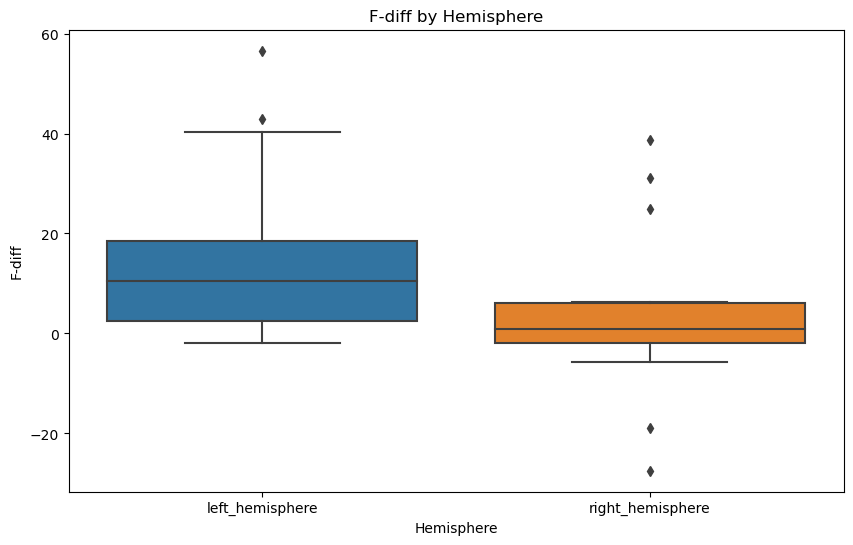

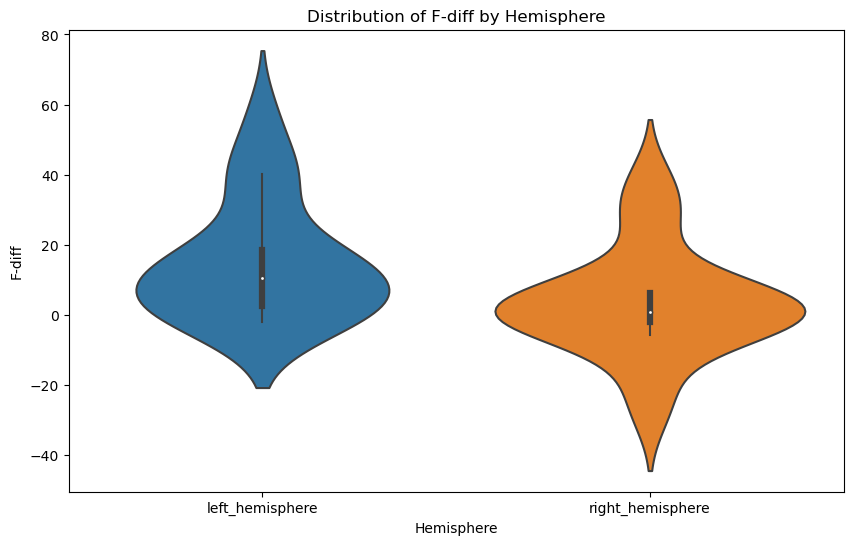


Wilcoxon Signed-Rank Test:
W-statistic: 21.0000
P-value: 0.0017

Effect Size:
Cohen's d: 0.8098


In [9]:
##main effect by hemisphere:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
input_file = f"{results_dir}/gca/subject_roi_pair_summary.csv"
df = pd.read_csv(input_file)

print(f"Input file last modified: {pd.to_datetime(os.path.getmtime(input_file), unit='s')}")
print("First few rows of input data:")
print(df.head())

# Combine left and right hemisphere data
df['left_hemisphere'] = df['lpIPS-lLO'] + df['lpIPS-rLO']
df['right_hemisphere'] = df['rpIPS-lLO'] + df['rpIPS-rLO']

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(df['left_hemisphere'], df['right_hemisphere'])

print("\nMain Effect Analysis:")
print(f"Left Hemisphere Mean: {df['left_hemisphere'].mean():.4f}")
print(f"Right Hemisphere Mean: {df['right_hemisphere'].mean():.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Create a box plot to visualize the difference
plt.figure(figsize=(10, 6))
data_to_plot = pd.melt(df[['left_hemisphere', 'right_hemisphere']], 
                       var_name='Hemisphere', value_name='F-diff')
sns.boxplot(x='Hemisphere', y='F-diff', data=data_to_plot)
plt.title('F-diff by Hemisphere')
plt.show()

# Create a violin plot for a more detailed view of the distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hemisphere', y='F-diff', data=data_to_plot)
plt.title('Distribution of F-diff by Hemisphere')
plt.show()

# Perform Wilcoxon signed-rank test (non-parametric alternative to paired t-test)
w_statistic, w_p_value = stats.wilcoxon(df['left_hemisphere'], df['right_hemisphere'])

print("\nWilcoxon Signed-Rank Test:")
print(f"W-statistic: {w_statistic:.4f}")
print(f"P-value: {w_p_value:.4f}")

# Effect size calculation (Cohen's d for paired samples)
d = (df['left_hemisphere'] - df['right_hemisphere']).mean() / \
    (df['left_hemisphere'] - df['right_hemisphere']).std()

print("\nEffect Size:")
print(f"Cohen's d: {d:.4f}")

First few rows of the data:
       sub  lpIPS-lLO  lpIPS-rLO  rpIPS-lLO  rpIPS-rLO
0  sub-025   6.542707   3.976337  -0.273055  -5.516101
1  sub-038  36.221112   6.748750   5.041650   0.858832
2  sub-057   1.978192  33.322356   3.193565  21.792058
3  sub-059   7.953541   1.820534   0.604075 -19.537321
4  sub-064   1.015321   3.283093   1.859057   4.341189

Column names and data types:
sub           object
lpIPS-lLO    float64
lpIPS-rLO    float64
rpIPS-lLO    float64
rpIPS-rLO    float64
dtype: object


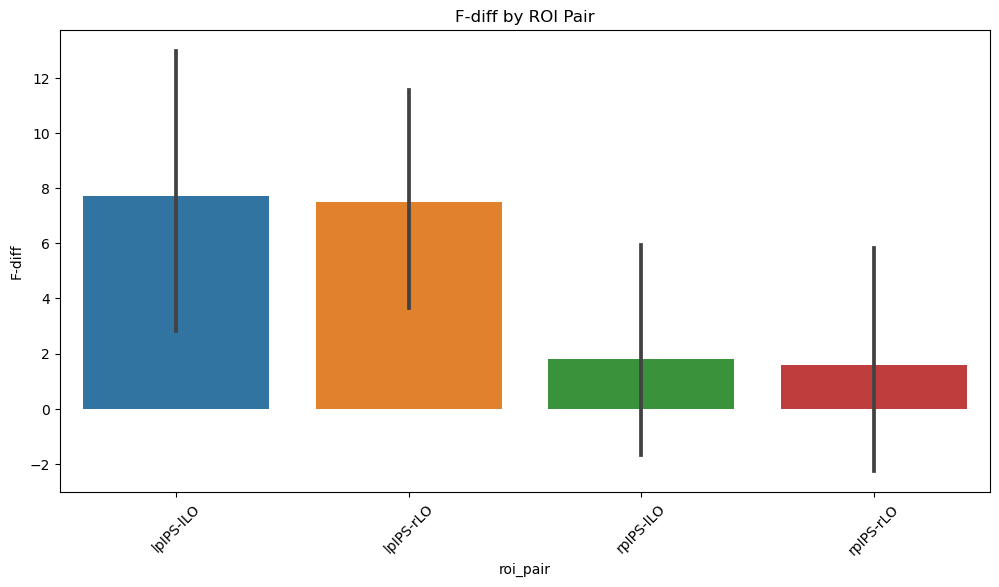

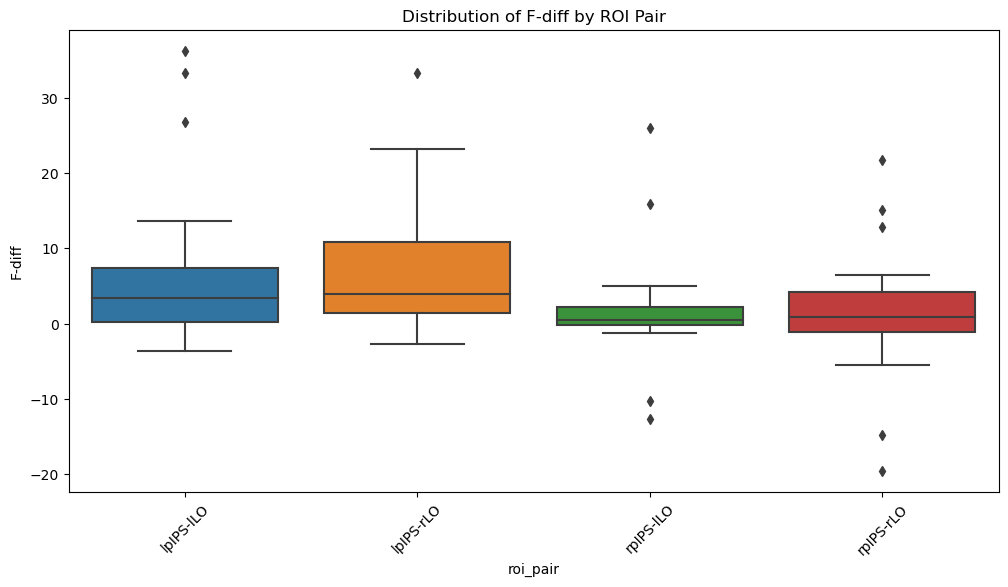

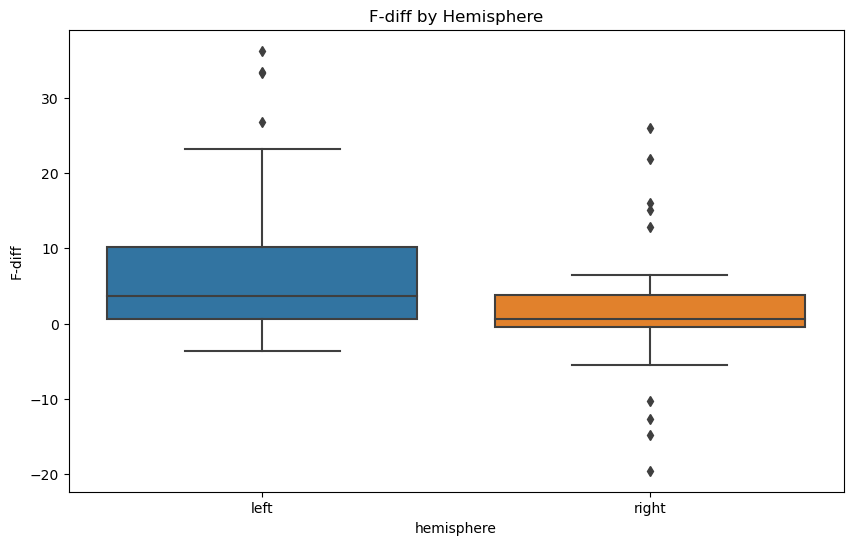


Summary Statistics:
               mean    median        std        min        max
roi_pair                                                      
lpIPS-lLO  7.714844  3.470529  11.702146  -3.652964  36.221112
lpIPS-rLO  7.492830  3.976337   9.013431  -2.723258  33.322356
rpIPS-lLO  1.818136  0.524067   8.123857 -12.641338  25.974031
rpIPS-rLO  1.581903  0.858832   9.326387 -19.537321  21.792058

Hemisphere Summary Statistics:
                mean    median        std        min        max
hemisphere                                                     
left        7.603837  3.723433  10.303171  -3.652964  36.221112
right       1.700019  0.616450   8.627649 -19.537321  25.974031

Summary statistics saved to: /user_data/csimmon2/git_repos/ptoc/results/gca/gca_summary_stats.csv


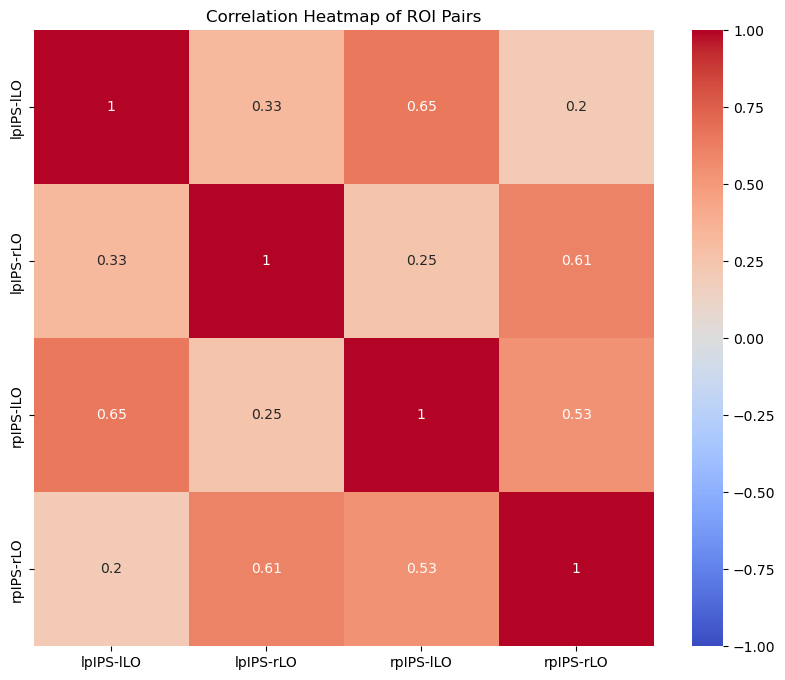


Analysis complete. Check the output and saved files.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to your CSV file
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
gca_results_path = f"{results_dir}/gca/subject_roi_pair_summary.csv"

# Read the CSV file
results = pd.read_csv(gca_results_path)

# Print the first few rows to verify the data
print("First few rows of the data:")
print(results.head())

# Print column names and data types
print("\nColumn names and data types:")
print(results.dtypes)

# Reshape the data
roi_pairs = ['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO']
results_melted = pd.melt(results, id_vars=['sub'], value_vars=roi_pairs, var_name='roi_pair', value_name='f_diff')
results_melted['hemisphere'] = results_melted['roi_pair'].apply(lambda x: 'left' if x.startswith('l') else 'right')

# Create a bar plot of f_diff for each ROI pair
plt.figure(figsize=(12, 6))
sns.barplot(x='roi_pair', y='f_diff', data=results_melted)
plt.title('F-diff by ROI Pair')
plt.ylabel('F-diff')
plt.xticks(rotation=45)
plt.show()

# Create a box plot of f_diff for each ROI pair
plt.figure(figsize=(12, 6))
sns.boxplot(x='roi_pair', y='f_diff', data=results_melted)
plt.title('Distribution of F-diff by ROI Pair')
plt.ylabel('F-diff')
plt.xticks(rotation=45)
plt.show()

# Compare left and right hemispheres
plt.figure(figsize=(10, 6))
sns.boxplot(x='hemisphere', y='f_diff', data=results_melted)
plt.title('F-diff by Hemisphere')
plt.ylabel('F-diff')
plt.show()

# Calculate and print summary statistics
summary_stats = results_melted.groupby('roi_pair')['f_diff'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nSummary Statistics:")
print(summary_stats)

# Calculate and print hemisphere summary statistics
hemisphere_stats = results_melted.groupby('hemisphere')['f_diff'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nHemisphere Summary Statistics:")
print(hemisphere_stats)

# Save the summary statistics to a CSV file
summary_output_path = f"{results_dir}/gca/gca_summary_stats.csv"
summary_stats.to_csv(summary_output_path)
print(f"\nSummary statistics saved to: {summary_output_path}")

# create a heatmap of correlations between ROI pairs
correlation_matrix = results[roi_pairs].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of ROI Pairs')
plt.show()

print("\nAnalysis complete. Check the output and saved files.")

T-statistic: 4.3302
P-value: 0.0001
W-statistic: 116.0000
Wilcoxon p-value: 0.0001


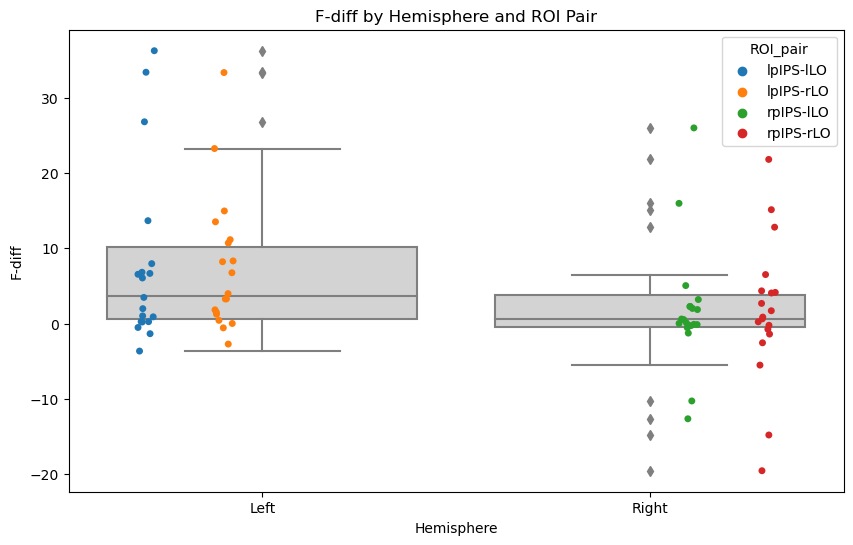

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv(gca_results_path)

# Organize data
left_hemisphere = df[['lpIPS-lLO', 'lpIPS-rLO']]
right_hemisphere = df[['rpIPS-lLO', 'rpIPS-rLO']]

# Reshape data for analysis
left_data = left_hemisphere.values.flatten()
right_data = right_hemisphere.values.flatten()

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(left_data, right_data)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Wilcoxon signed-rank test
w_statistic, w_p_value = stats.wilcoxon(left_data, right_data)

print(f"W-statistic: {w_statistic:.4f}")
print(f"Wilcoxon p-value: {w_p_value:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data for plotting
plot_data = pd.melt(df, value_vars=['lpIPS-lLO', 'lpIPS-rLO', 'rpIPS-lLO', 'rpIPS-rLO'], 
                    var_name='ROI_pair', value_name='F-diff')
plot_data['Hemisphere'] = plot_data['ROI_pair'].apply(lambda x: 'Left' if x.startswith('l') else 'Right')

# Create plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hemisphere', y='F-diff', data=plot_data, color='lightgray')
sns.stripplot(x='Hemisphere', y='F-diff', hue='ROI_pair', data=plot_data, jitter=True, dodge=True)

plt.title('F-diff by Hemisphere and ROI Pair')
plt.show()

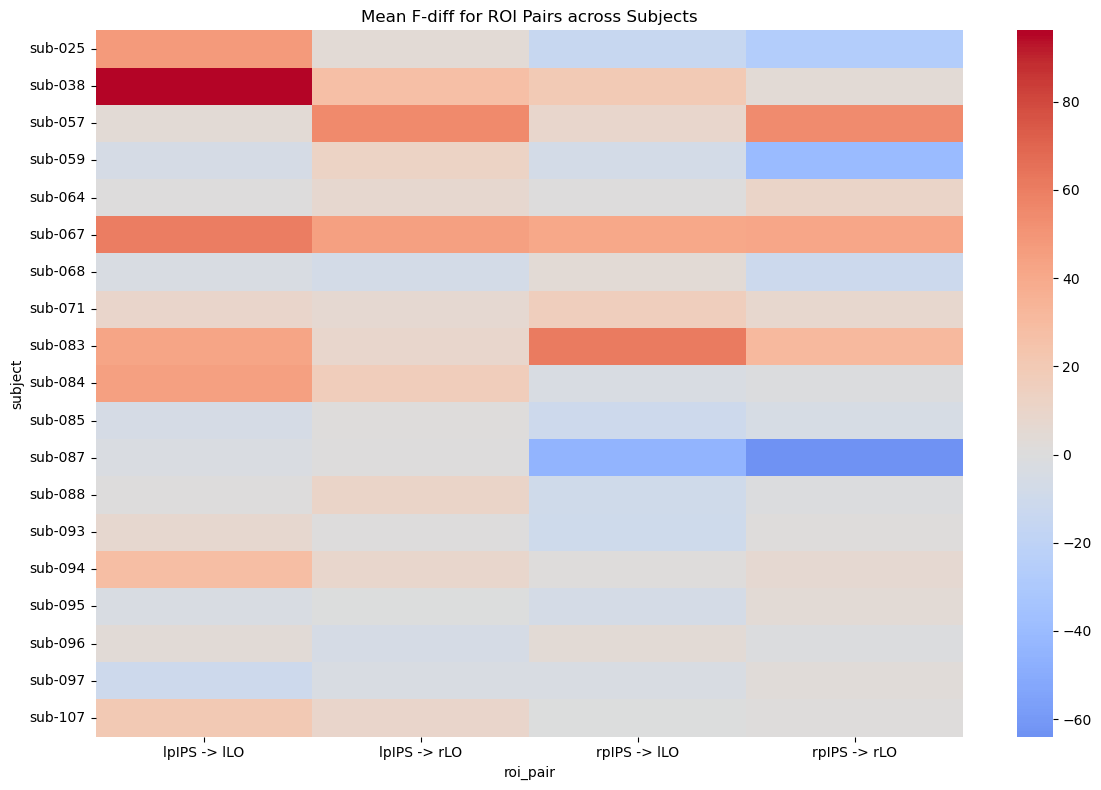

Summary Statistics for ROI Pairs:
       roi_pair       mean        std         min         max
0  lpIPS -> lLO  17.628484  36.343340  -22.756305  157.019687
1  lpIPS -> rLO  10.445062  22.694103  -16.515635   99.053747
2  rpIPS -> lLO   2.452459  26.909702  -85.293541   99.710341
3  rpIPS -> rLO   0.696633  36.351968 -147.480996  126.842006


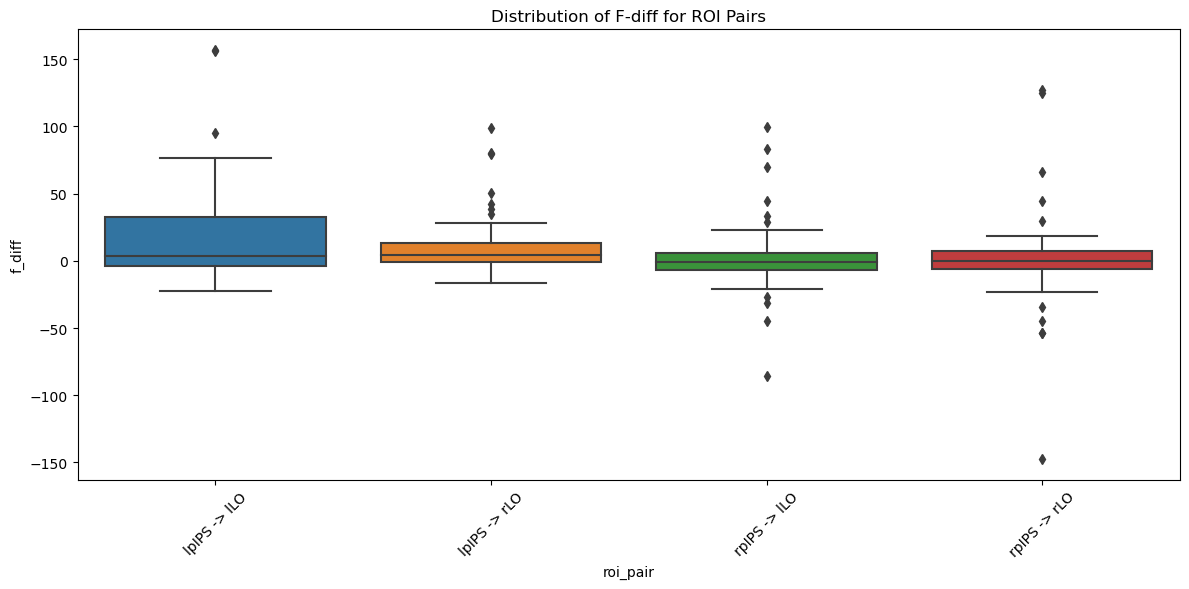


Subjects with extreme F-diff values (|F-diff| > 100):
     subject      roi_pair      f_diff
0    sub-025  lpIPS -> lLO   -6.462218
1    sub-025  lpIPS -> rLO   -8.507868
2    sub-025  rpIPS -> lLO  -21.204682
3    sub-025  rpIPS -> rLO  -23.523439
4    sub-025  lpIPS -> lLO  155.865394
..       ...           ...         ...
221  sub-107  lpIPS -> rLO   24.866760
223  sub-107  rpIPS -> rLO    7.402974
224  sub-107  lpIPS -> lLO   37.799001
225  sub-107  lpIPS -> rLO    4.476697
227  sub-107  rpIPS -> rLO   -3.967110

[180 rows x 3 columns]


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results/fc_gca'

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

# Function to read and process subject data
def process_subject_data(subject):
    file_path = f'{study_dir}/{subject}/ses-01/derivatives/results/fc_gca/gca_summary_fc.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['subject'] = subject
        return df
    else:
        print(f"File not found for subject {subject}")
        return None

# Collect data for all subjects
all_data = [process_subject_data(sub) for sub in subs]
all_data = [df for df in all_data if df is not None]

# Combine all subject data
combined_data = pd.concat(all_data, ignore_index=True)

# Process the data
combined_data['roi_pair'] = combined_data['origin'] + ' -> ' + combined_data['target']
combined_data['absolute_f_diff'] = abs(combined_data['f_diff'])

# Calculate mean F-diff for each ROI pair and subject
mean_f_diff = combined_data.groupby(['subject', 'roi_pair'])['f_diff'].mean().reset_index()

# Create a pivot table for heatmap
heatmap_data = mean_f_diff.pivot(index='subject', columns='roi_pair', values='f_diff')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', center=0)
plt.title('Mean F-diff for ROI Pairs across Subjects')
plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats = combined_data.groupby('roi_pair')['f_diff'].agg(['mean', 'std', 'min', 'max']).reset_index()
print("Summary Statistics for ROI Pairs:")
print(summary_stats)

# Plot boxplot of F-diff distribution for each ROI pair
plt.figure(figsize=(12, 6))
sns.boxplot(x='roi_pair', y='f_diff', data=combined_data)
plt.title('Distribution of F-diff for ROI Pairs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify subjects with extreme F-diff values
threshold = 2  # You can adjust this threshold
extreme_values = combined_data[abs(combined_data['f_diff']) > threshold]
if not extreme_values.empty:
    print("\nSubjects with extreme F-diff values (|F-diff| > 100):")
    print(extreme_values[['subject', 'roi_pair', 'f_diff']])
else:
    print("\nNo subjects found with extreme F-diff values (|F-diff| > 100)")
    

In [5]:
import os
import pandas as pd
import numpy as np

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

# Function to read and process subject data
def process_subject_data(subject):
    file_path = f'{study_dir}/{subject}/ses-01/derivatives/results/fc_gca/gca_summary_fc.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['subject'] = subject
        return df
    else:
        print(f"File not found for subject {subject}")
        return None

# Collect data for all subjects
all_data = [process_subject_data(sub) for sub in subs]
all_data = [df for df in all_data if df is not None]

# Combine all subject data
combined_data = pd.concat(all_data, ignore_index=True)

# Create ROI pair column
combined_data['roi_pair'] = combined_data['origin'] + ' -> ' + combined_data['target']

# Group by subject and ROI pair, and aggregate f_diff values
grouped_data = combined_data.groupby(['subject', 'roi_pair'])['f_diff'].agg(list).unstack()

# Display the grouped data
print("F-diff values for each subject and ROI pair:")
print(grouped_data)

# Calculate and display summary statistics
summary_stats = grouped_data.applymap(lambda x: pd.Series(x) if isinstance(x, list) else pd.Series([x])).agg(['mean', 'std', 'min', 'max'])
print("\nSummary statistics across subjects for each ROI pair:")
print(summary_stats)

# Identify subjects with extreme values (optional)
threshold = 2  # You can adjust this threshold

def check_extreme(values):
    if isinstance(values, list):
        return any(abs(v) > threshold for v in values)
    return abs(values) > threshold

extreme_mask = grouped_data.applymap(check_extreme)

if extreme_mask.any().any():
    print("\nSubjects with extreme F-diff values (|F-diff| > 2):")
    for subject in extreme_mask.index:
        for roi_pair in extreme_mask.columns:
            if extreme_mask.loc[subject, roi_pair]:
                values = grouped_data.loc[subject, roi_pair]
                if isinstance(values, list):
                    extreme_values = [v for v in values if abs(v) > threshold]
                    for value in extreme_values:
                        print(f"Subject: {subject}, ROI Pair: {roi_pair}, F-diff: {value}")
                else:
                    print(f"Subject: {subject}, ROI Pair: {roi_pair}, F-diff: {values}")
else:
    print("\nNo subjects found with extreme F-diff values (|F-diff| > 2)")

F-diff values for each subject and ROI pair:
roi_pair                                       lpIPS -> lLO  \
subject                                                       
sub-025   [-6.46221754577444, 155.8653944386762, -5.4896...   
sub-038   [157.01968728278075, 55.0027273573871, 76.5728...   
sub-057   [15.124445382156765, -9.505281392841074, 6.471...   
sub-059   [-9.123681159455508, -10.375572490429931, 3.72...   
sub-064   [2.824125116942365, 7.799892569769491, -8.6721...   
sub-067   [35.16163814194205, 51.5619452039701, 94.84790...   
sub-068   [-0.7930455206153119, -0.6031841357508038, -7....   
sub-071   [36.24143692961577, -2.158182613034498, -4.527...   
sub-083   [45.48276466860748, 24.715871566512515, 56.643...   
sub-084   [35.93013692613245, 63.04955054563136, 34.0121...   
sub-085   [-8.072957705082187, -4.099397637070422, -3.75...   
sub-087   [0.7682344874303659, 15.263617575771658, -22.7...   
sub-088   [-3.6941825995006696, -1.888038076208972, 5.79...   
sub-093   

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
import os
import pandas as pd
import numpy as np

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

# Function to read and process subject data
def process_subject_data(subject):
    file_path = f'{study_dir}/{subject}/ses-01/derivatives/results/fc_gca/gca_summary_fc.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['subject'] = subject
        return df
    else:
        print(f"File not found for subject {subject}")
        return None

# Collect data for all subjects
all_data = [process_subject_data(sub) for sub in subs]
all_data = [df for df in all_data if df is not None]

# Combine all subject data
combined_data = pd.concat(all_data, ignore_index=True)

# Create ROI pair column
combined_data['roi_pair'] = combined_data['origin'] + ' -> ' + combined_data['target']

# Group by subject and ROI pair, and aggregate f_diff values
grouped_data = combined_data.groupby(['subject', 'roi_pair'])['f_diff'].agg(list).unstack()

# Calculate mean for each subject and ROI pair
mean_data = grouped_data.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)

# Combine individual runs and mean into a single DataFrame
result_data = pd.DataFrame()
for column in grouped_data.columns:
    result_data[f"{column}_run1"] = grouped_data[column].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else np.nan)
    result_data[f"{column}_run2"] = grouped_data[column].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else np.nan)
    result_data[f"{column}_run3"] = grouped_data[column].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else np.nan)
    result_data[f"{column}_mean"] = mean_data[column]

# Display the result data
print("F-diff values for each subject and ROI pair (including mean):")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Don't wrap to the next line
print(result_data)

# Calculate and display summary statistics
summary_stats = result_data.agg(['mean', 'std', 'min', 'max'])
print("\nSummary statistics across subjects for each ROI pair and run:")
print(summary_stats)

# Identify subjects with extreme values (optional)
threshold = 2  # You can adjust this threshold

def check_extreme(value):
    return abs(value) > threshold if not pd.isna(value) else False

extreme_mask = result_data.applymap(check_extreme)

if extreme_mask.any().any():
    print("\nSubjects with extreme F-diff values (|F-diff| > 2):")
    for subject in extreme_mask.index:
        for column in extreme_mask.columns:
            if extreme_mask.loc[subject, column]:
                value = result_data.loc[subject, column]
                print(f"Subject: {subject}, Column: {column}, F-diff: {value}")
else:
    print("\nNo subjects found with extreme F-diff values (|F-diff| > 2)")

F-diff values for each subject and ROI pair (including mean):
         lpIPS -> lLO_run1  lpIPS -> lLO_run2  lpIPS -> lLO_run3  \
subject                                                            
sub-025          -6.462218         155.865394          -5.489689   
sub-038         157.019687          55.002727          76.572889   
sub-057          15.124445          -9.505281           6.471743   
sub-059          -9.123681         -10.375572           3.729981   
sub-064           2.824125           7.799893          -8.672142   
sub-067          35.161638          51.561945          94.847908   
sub-068          -0.793046          -0.603184          -7.389894   
sub-071          36.241437          -2.158183          -4.527132   
sub-083          45.482765          24.715872          56.643925   
sub-084          35.930137          63.049551          34.012120   
sub-085          -8.072958          -4.099398          -3.754502   
sub-087           0.768234          15.263618         

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
output_dir = '/user_data/csimmon2/git_repos/ptoc/results/roi_analysis'
os.makedirs(output_dir, exist_ok=True)

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

def load_gca_data(subject):
    file_path = f'{study_dir}/{subject}/ses-01/derivatives/results/fc_gca/gca_summary_fc.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['subject'] = subject
        return df
    else:
        print(f"GCA summary file not found for subject {subject}")
        return None

# Load data for all subjects
all_data = [load_gca_data(sub) for sub in subs]
all_data = [df for df in all_data if df is not None]

if not all_data:
    raise ValueError("No data found for any subjects.")

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Process the data
combined_data['roi_pair'] = combined_data['origin'] + ' -> ' + combined_data['target']

# Reshape data for analysis
reshaped_data = combined_data.pivot_table(values='f_diff', 
                                          index=['subject', 'fold'], 
                                          columns='roi_pair')

# Calculate summary statistics
summary_stats = reshaped_data.agg(['mean', 'std', 'min', 'max'])
summary_stats = summary_stats.transpose().reset_index()
summary_stats.columns = ['roi_pair', 'mean', 'std', 'min', 'max']

# Save summary statistics
summary_stats.to_csv(os.path.join(output_dir, 'roi_pair_f_diff_summary.csv'), index=False)

# Create visualizations
plt.figure(figsize=(15, 10))
sns.boxplot(x='roi_pair', y='f_diff', data=combined_data)
plt.title('F-diff Across ROI Pairs')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig(os.path.join(output_dir, 'roi_pair_f_diff_boxplot.png'))
#plt.close()

# Create heatmap of f_diff values
plt.figure(figsize=(15, 20))
sns.heatmap(reshaped_data, cmap='coolwarm', center=0)
plt.title('ROI Pair F-diff Heatmap')
plt.tight_layout()
#plt.savefig(os.path.join(output_dir, 'roi_pair_f_diff_heatmap.png'))
#plt.close()

# Calculate variability across run combinations for each subject and ROI pair
variability = combined_data.groupby(['subject', 'roi_pair'])['f_diff'].agg(['mean', 'std', lambda x: x.std() / x.mean()])
variability.columns = ['mean', 'std', 'cv']
variability = variability.reset_index()
variability.to_csv(os.path.join(output_dir, 'roi_pair_f_diff_variability.csv'), index=False)

print("Analysis complete. Results and visualizations saved in the output directory.")

# Display some key findings
print("\nSummary Statistics:")
print(summary_stats)

print("\nTop 10 highest variability (CV) cases:")
print(variability.sort_values('cv', ascending=False).head(10))

print("\nAverage variability (CV) by ROI pair:")
print(variability.groupby('roi_pair')['cv'].mean().sort_values(ascending=False))

Analysis complete. Results and visualizations saved in the output directory.

Summary Statistics:
       roi_pair       mean        std         min         max
0  lpIPS -> lLO  17.628484  36.343340  -22.756305  157.019687
1  lpIPS -> rLO  10.445062  22.694103  -16.515635   99.053747
2  rpIPS -> lLO   2.452459  26.909702  -85.293541   99.710341
3  rpIPS -> rLO   0.696633  36.351968 -147.480996  126.842006

Top 10 highest variability (CV) cases:
    subject      roi_pair      mean        std         cv
48  sub-088  lpIPS -> lLO  0.069312   5.036029  72.657550
45  sub-087  lpIPS -> rLO  0.491352  15.006505  30.541271
16  sub-064  lpIPS -> lLO  0.650625   8.448376  12.985013
53  sub-093  lpIPS -> rLO  0.435220   4.122877   9.473093
58  sub-094  rpIPS -> lLO  1.494790  11.365027   7.603091
75  sub-107  rpIPS -> rLO  1.196675   5.756286   4.810235
18  sub-064  rpIPS -> lLO  0.379067   1.798503   4.744550
1   sub-025  lpIPS -> rLO  4.552044  19.802740   4.350296
55  sub-093  rpIPS -> rLO  1.3

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
output_dir = '/user_data/csimmon2/git_repos/ptoc/results/roi_analysis'
os.makedirs(output_dir, exist_ok=True)

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

def load_gca_data(subject):
    file_path = f'{study_dir}/{subject}/ses-01/derivatives/results/fc_gca/gca_summary_fc.csv'
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['subject'] = subject
        return df
    else:
        print(f"GCA summary file not found for subject {subject}")
        return None

# Load data for all subjects
all_data = [load_gca_data(sub) for sub in subs]
all_data = [df for df in all_data if df is not None]

if not all_data:
    raise ValueError("No data found for any subjects.")

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Process the data
combined_data['roi_pair'] = combined_data['origin'] + ' -> ' + combined_data['target']

# Function to create visualizations for each run combination
def create_visualizations(data, run_combo):
    # Boxplot
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='roi_pair', y='f_diff', data=data)
    plt.title(f'F-diff Across ROI Pairs - Run Combination {run_combo}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #plt.savefig(os.path.join(output_dir, f'roi_pair_f_diff_boxplot_run{run_combo}.png'))
    plt.close()

    # Heatmap
    pivot_data = data.pivot(index='subject', columns='roi_pair', values='f_diff')
    plt.figure(figsize=(15, 20))
    sns.heatmap(pivot_data, cmap='coolwarm', center=0)
    plt.title(f'ROI Pair F-diff Heatmap - Run Combination {run_combo}')
    plt.tight_layout()
    #plt.savefig(os.path.join(output_dir, f'roi_pair_f_diff_heatmap_run{run_combo}.png'))
    plt.close()

# Analyze each run combination separately
run_combos = combined_data['fold'].unique()
for run_combo in run_combos:
    run_data = combined_data[combined_data['fold'] == run_combo]
    
    # Calculate summary statistics for this run combination
    summary_stats = run_data.groupby('roi_pair')['f_diff'].agg(['mean', 'std', 'min', 'max']).reset_index()
    summary_stats.to_csv(os.path.join(output_dir, f'roi_pair_f_diff_summary_run{run_combo}.csv'), index=False)
    
    # Create visualizations for this run combination
    create_visualizations(run_data, run_combo)
    
    print(f"\nSummary Statistics for Run Combination {run_combo}:")
    print(summary_stats)

# Calculate variability across subjects for each ROI pair and run combination
variability = combined_data.groupby(['fold', 'roi_pair'])['f_diff'].agg(['mean', 'std', lambda x: x.std() / x.mean()])
variability.columns = ['mean', 'std', 'cv']
variability = variability.reset_index()
variability.to_csv(os.path.join(output_dir, 'roi_pair_f_diff_variability_by_run.csv'), index=False)

print("\nAnalysis complete. Results and visualizations saved in the output directory.")

# Display some key findings
print("\nTop 10 highest variability (CV) cases across subjects:")
print(variability.sort_values('cv', ascending=False).head(10))

print("\nAverage variability (CV) by ROI pair across all run combinations:")
print(variability.groupby('roi_pair')['cv'].mean().sort_values(ascending=False))

# Calculate run-to-run variability for each subject and ROI pair
run_to_run_variability = combined_data.groupby(['subject', 'roi_pair'])['f_diff'].agg(['mean', 'std', lambda x: x.std() / x.mean()])
run_to_run_variability.columns = ['mean', 'std', 'cv']
run_to_run_variability = run_to_run_variability.reset_index()
run_to_run_variability.to_csv(os.path.join(output_dir, 'roi_pair_f_diff_run_to_run_variability.csv'), index=False)

print("\nTop 10 highest run-to-run variability (CV) cases:")
print(run_to_run_variability.sort_values('cv', ascending=False).head(10))

print("\nAverage run-to-run variability (CV) by ROI pair:")
print(run_to_run_variability.groupby('roi_pair')['cv'].mean().sort_values(ascending=False))


Summary Statistics for Run Combination 0:
       roi_pair       mean        std        min         max
0  lpIPS -> lLO  17.205333  37.965759  -9.123681  157.019687
1  lpIPS -> rLO   9.949217  19.938160  -8.507868   79.377333
2  rpIPS -> lLO   0.875823  13.969584 -21.204682   33.299278
3  rpIPS -> rLO  -4.405758  15.002138 -53.927218   15.113789

Summary Statistics for Run Combination 1:
       roi_pair       mean        std         min         max
0  lpIPS -> lLO  20.398590  40.376764  -12.644924  155.865394
1  lpIPS -> rLO   9.971335  18.100376  -16.515635   50.320348
2  rpIPS -> lLO   2.180416  24.073504  -44.444944   70.139663
3  rpIPS -> rLO  -0.272266  40.689544 -147.480996   65.935558

Summary Statistics for Run Combination 2:
       roi_pair       mean        std        min         max
0  lpIPS -> lLO  15.281528  31.992032 -22.756305   94.847908
1  lpIPS -> rLO  11.414635  29.591369 -14.887745   99.053747
2  rpIPS -> lLO   4.301139  38.364867 -85.293541   99.710341
3  rpIPS -> 

In [ ]:
import os
import pandas as pd
import glob

# Set up directories
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
output_dir = '/user_data/csimmon2/git_repos/ptoc/results'

# Read subject info
sub_info = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

# Initialize an empty list to store dataframes
all_coords = []

# Loop through each subject
for sub in subs:
    sub_dir = f'{study_dir}/{sub}/ses-01/'
    roi_dir = f'{sub_dir}/derivatives/rois'
    coord_file = f'{roi_dir}/spheres/sphere_coords_hemisphere.csv'
    
    if os.path.exists(coord_file):
        # Read the coordinate file
        coords = pd.read_csv(coord_file)
        
        # Add a subject column
        coords['subject'] = sub
        
        # Append to the list
        all_coords.append(coords)
    else:
        print(f"Coordinate file not found for subject {sub}")

# Combine all dataframes
if all_coords:
    combined_coords = pd.concat(all_coords, ignore_index=True)
    
    # Rearrange columns for better readability
    columns_order = ['subject', 'index', 'task', 'roi', 'hemisphere', 'x', 'y', 'z']
    combined_coords = combined_coords[columns_order]
    
    # Sort the dataframe
    combined_coords = combined_coords.sort_values(['subject', 'index', 'task', 'roi', 'hemisphere'])
    
    # Save the combined coordinates
    output_file = f"{output_dir}/all_subjects_roi_coordinates.csv"
    combined_coords.to_csv(output_file, index=False)
    print(f"Combined ROI coordinates saved to {output_file}")
    
    # Display summary statistics
    print("\nSummary of ROI coordinates:")
    summary = combined_coords.groupby(['index', 'task', 'roi', 'hemisphere'])[['x', 'y', 'z']].agg(['mean', 'std', 'min', 'max'])
    print(summary)
else:
    print("No coordinate data found for any subjects.")

# Optionally, check for consistency across subjects
print("\nChecking for consistency across subjects...")
consistency_check = combined_coords.groupby(['index', 'task', 'roi', 'hemisphere', 'x', 'y', 'z'])['subject'].nunique()
inconsistent = consistency_check[consistency_check > 1]

if not inconsistent.empty:
    print("The following coordinates are inconsistent across subjects:")
    print(inconsistent)
else:
    print("All coordinates are consistent across subjects.")

In [3]:
import os
import shutil
import logging
import pandas as pd

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

# Load subject information
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

def delete_fc_gca_folder(sub_dir, dry_run=True):
    """
    Delete the fc_gca folder for a specific subject.
    
    :param sub_dir: The subject's directory.
    :param dry_run: If True, only print the folders that would be deleted without actually deleting them.
    :return: True if folder was found and deleted (or would be deleted in dry run), False otherwise.
    """
    fc_gca_path = os.path.join(sub_dir, 'derivatives', 'results')
    if os.path.exists(fc_gca_path):
        if dry_run:
            logging.info(f"Would delete: {fc_gca_path}")
        else:
            try:
                shutil.rmtree(fc_gca_path)
                logging.info(f"Deleted: {fc_gca_path}")
            except Exception as e:
                logging.error(f"Error deleting {fc_gca_path}: {e}")
                return False
        return True
    else:
        logging.info(f"fc_gca folder not found for: {sub_dir}")
        return False

def process_subjects(dry_run=True):
    """
    Process all subjects and delete their fc_gca folders.
    
    :param dry_run: If True, only print the folders that would be deleted without actually deleting them.
    """
    deleted_count = 0
    for sub in subs:
        sub_dir = os.path.join(study_dir, sub, 'ses-01')
        if delete_fc_gca_folder(sub_dir, dry_run):
            deleted_count += 1
    
    if dry_run:
        logging.info(f"Dry run complete. {deleted_count} fc_gca folders would be deleted.")
    else:
        logging.info(f"Deletion complete. {deleted_count} fc_gca folders were deleted.")

# Usage
if __name__ == "__main__":
    # First, do a dry run
    process_subjects(dry_run=False)
    
    # If the dry run looks good, uncomment the following line to actually delete the folders
    # process_subjects(dry_run=False)

2024-09-17 17:40:39,084 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-025/ses-01/derivatives/results


2024-09-17 17:40:39,114 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-038/ses-01/derivatives/results
2024-09-17 17:40:39,236 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-057/ses-01/derivatives/results
2024-09-17 17:40:39,238 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-059/ses-01/derivatives/results
2024-09-17 17:40:39,245 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-064/ses-01/derivatives/results
2024-09-17 17:40:39,265 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-067/ses-01/derivatives/results
2024-09-17 17:40:39,273 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-068/ses-01/derivatives/results
2024-09-17 17:40:39,296 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-071/ses-01/derivatives/results
2024-09-17 17:40:39,303 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-083/ses-01/derivatives/results
2024-09-17 17:40:39,330 - INFO - Deleted: /lab_data/behrmannlab/vlad/ptoc/sub-084/ses-01/derivatives/results
2024-09-17 17:40:39

In [4]:
import os
import logging
import pandas as pd

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Set up directories and parameters
study = 'ptoc'
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

# Load subject information
sub_info = pd.read_csv(f'{curr_dir}/sub_info.csv')
sub_info = sub_info[sub_info['group'] == 'control']
subs = sub_info['sub'].tolist()

def create_gca_folder(sub_dir):
    """
    Create a 'gca' folder for a specific subject.
    
    :param sub_dir: The subject's directory.
    :return: True if folder was created or already exists, False if there was an error.
    """
    gca_path = os.path.join(sub_dir, 'derivatives', 'gca')
    if os.path.exists(gca_path):
        logging.info(f"GCA folder already exists for: {sub_dir}")
        return True
    else:
        try:
            os.makedirs(gca_path, exist_ok=True)
            logging.info(f"Created GCA folder: {gca_path}")
            return True
        except Exception as e:
            logging.error(f"Error creating GCA folder for {sub_dir}: {e}")
            return False

def process_subjects():
    """
    Process all subjects and create their GCA folders.
    """
    created_count = 0
    for sub in subs:
        sub_dir = os.path.join(study_dir, sub, 'ses-01')
        if create_gca_folder(sub_dir):
            created_count += 1
    
    logging.info(f"Process complete. {created_count} GCA folders were created or already existed.")

# Usage
if __name__ == "__main__":
    process_subjects()

2024-09-17 17:40:55,752 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-025/ses-01/derivatives/gca
2024-09-17 17:40:55,754 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-038/ses-01/derivatives/gca
2024-09-17 17:40:55,776 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-057/ses-01/derivatives/gca
2024-09-17 17:40:55,778 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-059/ses-01/derivatives/gca
2024-09-17 17:40:55,780 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-064/ses-01/derivatives/gca
2024-09-17 17:40:55,782 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-067/ses-01/derivatives/gca
2024-09-17 17:40:55,784 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-068/ses-01/derivatives/gca
2024-09-17 17:40:55,785 - INFO - Created GCA folder: /lab_data/behrmannlab/vlad/ptoc/sub-071/ses-01/derivatives/gca
2024-09-17 17:40:55,787 - INFO - Created GCA folder: /lab_data/behrmannl